# Analysis

I did the encoding manually as suggested in lesson 4.2, I'm not sure how to interpret these numbers, or what I should have done to normalize the data.  I'm going to need some help with this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('table_8.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']])
dataset['Population2'] = dataset['Population']**2
murd = []
robb = []
for row in dataset['Murder']:
    if row  > 0:
        murd.append(1)
    else:
        murd.append(0)
for row in dataset['Robbery']:
    if row  > 0:
        robb.append(1)
    else:
        robb.append(0)
se = pd.Series(murd)
dataset['Murdboo'] = se.values
re = pd.Series(robb)
dataset['Robboo'] = re.values

X = dataset[['Population', 'Population2', 'Murder', 'Murdboo', 'Robbery', 'Robboo']]  #independent variables
y = dataset[['Propertycrime']].values     #dependent variable

'''
X[:, *:*] =imputer.transform(X[:, *:*])
#Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()
labelencoder_X.fit_transform(X[:,*:*])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
y = labelencoder_y.fit_transform(y)
'''
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

"""
#Fit the MLR to the Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Predicting the Test set results
y_pred = regressor.predict(X_test)
# Inspect the results.
print('\nCoefficients: \n', regressor.coef_)
print('\nIntercept: \n', regressor.intercept_)
print('\nR-squared:')
print(regressor.score(X, y))


Coefficients: 
 [[ 1.57736890e-02 -8.66770843e-10  1.41983630e+02 -1.35011634e+02
   1.20542633e+00  1.17473886e+02]]

Intercept: 
 [-19.42639238]

R-squared:
0.9987686750564472


C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
X.head(5)


,Population,Population2,Murder,Murdboo,Robbery,Robboo
0,1861,3463321,0,0,0,0
1,2577,6640929,0,0,0,0
2,2846,8099716,0,0,0,0
3,97956,9595377936,8,1,227,1
4,6388,40806544,0,0,4,1


(array([31.,  4.,  2.,  1.,  1.,  1.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

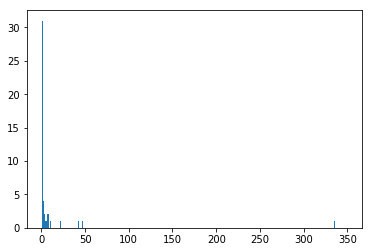

In [3]:


plt.hist(dataset['Murder'], bins=range(1, 350))

(array([56., 25., 23., 14., 10.,  6.,  3.,  5.,  3.,  3.,  5.,  4.,  5.,
         0.,  1.,  7.,  2.,  0.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
         0.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

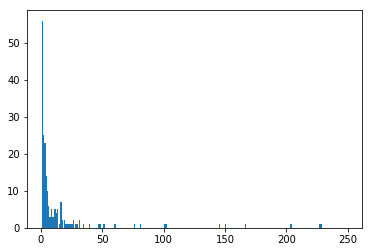

In [4]:
plt.hist(dataset['Robbery'], bins=range(1, 250))
